In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Measuring the speed at which these files download

In [2]:
%%time
hdu = fits.open('/arc/home/aydanmckay/pristine-xmatch-phottable-exact.fits')
datafi = hdu[1].data

CPU times: user 282 ms, sys: 77 ms, total: 359 ms
Wall time: 362 ms


In [3]:
%%time
datapd = pd.read_csv('/arc/home/aydanmckay/pristine-xmatch-phottable-exact.csv')

CPU times: user 47.4 s, sys: 1min 35s, total: 2min 22s
Wall time: 2min 32s


In [4]:
%%time
# datanp = np.genfromtxt('/arc/home/aydanmckay/pristine-xmatch-phottable-exact.csv',delimiter=',',colnames)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


Well it looks like the fits table is much quicker which is definitely surprising to me

In [5]:
len(datafi['ra'])

36331574

In [6]:
len(datapd['ra'])

8364683

In [7]:
# len(datanp)

Now wait a sec. Why is this one so much smaller? I guess its not the method I want to use anyway, but thats definitely curious.

In [8]:
# hdu[1].header

#### Separation Parameters:
'pris_2mass_angDist' \
'pris_wise_angDist' \
'2mass_wise_sep' \
'pris_sdss_angDist' \
'pris_galex_angDist' \
'sdss_galex_sep' \
'Separation_1' \
'pris_legacy_sep' \
'pris_gaia_sep' \
'legacy_gaia_sep' \
'pris_cfis_sep' \
'pris_pans_sep' \
'cfis_pans_sep' \
'Separation_2' \
'Separation'

In [9]:
def lognormshift(x,a,b,c):
    y = a * np.exp(-0.5 * ((np.log(x)-b)/c)**2)
    return y

array([ 2.80152425, -1.90769667,  0.75309724])

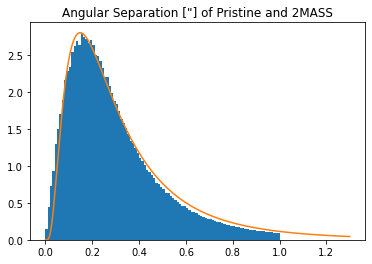

In [10]:
histo = plt.hist(datafi['pris_2mass_angDist'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and 2MASS')
popt

array([ 4.51870241, -2.63720006,  0.83277199])

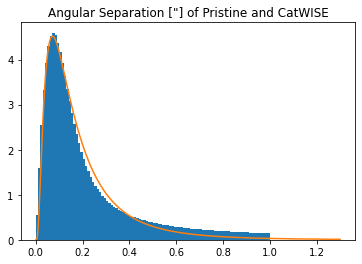

In [11]:
histo = plt.hist(datafi['pris_wise_angDist'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and CatWISE')
popt

array([ 5.63404913, -2.85811005,  0.87343888])

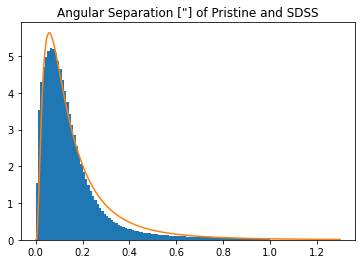

In [12]:
histo = plt.hist(datafi['pris_sdss_angDist'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and SDSS')
popt

array([ 0.82773207, -0.57195498,  0.78006435])

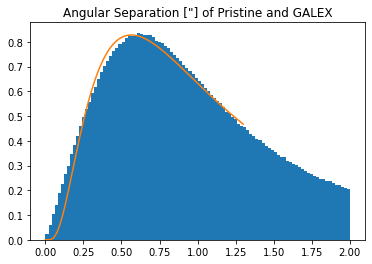

In [13]:
histo = plt.hist(datafi['pris_galex_angDist'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and GALEX')
popt

array([ 9.56459587, -3.13535134,  0.71855783])

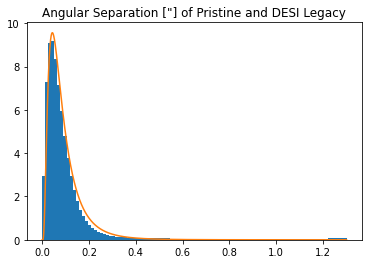

In [14]:
histo = plt.hist(datafi['pris_legacy_sep'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and DESI Legacy')
popt

array([ 9.79632916, -3.1026149 ,  0.71964544])

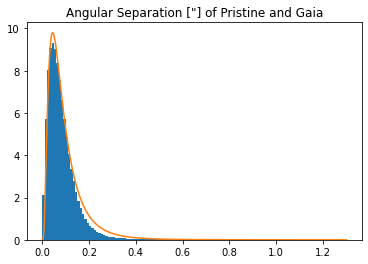

In [15]:
histo = plt.hist(datafi['pris_gaia_sep'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and Gaia')
popt

array([ 9.04764175, -3.11893809,  0.74679139])

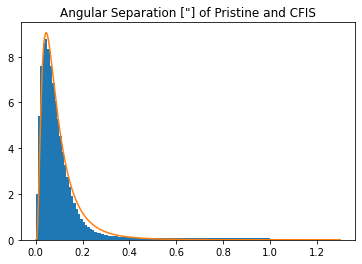

In [16]:
histo = plt.hist(datafi['pris_cfis_sep'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and CFIS')
popt

array([ 9.60663847, -3.15615116,  0.7029005 ])

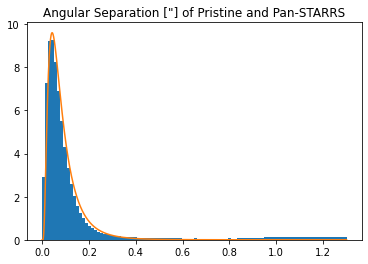

In [17]:
histo = plt.hist(datafi['pris_pans_sep'],bins=100,density=True)
popt, pcov = curve_fit(lognormshift,histo[1][1:],histo[0])
x = np.linspace(0.0001,1.3,10000)
plt.plot(x,lognormshift(x,*popt),label="Fitted shifted log-normal distn")
plt.title('Angular Separation [\"] of Pristine and Pan-STARRS')
popt

So it looks like we're missing a parameter from the log normal distribution in order to properly fit the data. It could also be a result of how the fit is matched to the bins. I tried the bin middles and that seemed more off than the bin ends, so theres some research to be done there.